In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'geopandas'

In [56]:
covid_india=pd.read_csv("India_data.csv")

In [57]:
covid_india.tail()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
3295,2020-06-23,Telangana,18.112400,79.019300,8674,217,4005,872,7,274
3296,2020-06-23,Tripura,23.940800,91.988200,1237,1,782,16,0,23
3297,2020-06-23,Uttar Pradesh,26.846700,80.946200,18322,569,11601,591,19,606
3298,2020-06-23,Uttarakhand,30.066800,79.019300,2402,28,1521,58,1,21
3299,2020-06-23,West Bengal,22.986800,87.855000,14358,569,8687,413,14,390


In [58]:
india_data=covid_india.drop(["Latitude","Longitude","New cases","New deaths","New recovered"],axis=1)
india_data["Date"]=pd.to_datetime(india_data["Date"])
india_data.tail()

,Date,Name of State / UT,Total Confirmed cases,Death,Cured/Discharged/Migrated
3295,2020-06-23,Telangana,8674,217,4005
3296,2020-06-23,Tripura,1237,1,782
3297,2020-06-23,Uttar Pradesh,18322,569,11601
3298,2020-06-23,Uttarakhand,2402,28,1521
3299,2020-06-23,West Bengal,14358,569,8687


In [62]:
co=india_data[['Name of State / UT','Total Confirmed cases',"Death","Cured/Discharged/Migrated"]]
states_data=co.groupby(['Name of State / UT']).agg({"Total Confirmed cases":"max","Death":"max","Cured/Discharged/Migrated":"max"})
states_data=states_data.sort_values(["Total Confirmed cases","Death","Cured/Discharged/Migrated"],ascending=[1,1,1])
states_data.drop('Telengana',inplace=True)
states_data

,Total Confirmed cases,Death,Cured/Discharged/Migrated
Name of State / UT,,,
Union Territory of Chandigarh,1,0,0
Union Territory of Jammu and Kashmir,4,0,0
Union Territory of Ladakh,10,0,0
Meghalaya,44,1,37
Andaman and Nicobar Islands,48,0,37
Sikkim,78,0,29
Dadra and Nagar Haveli and Daman and Diu,91,0,27
Arunachal Pradesh,139,0,21
Mizoram,141,0,9


In [17]:
states_data.rename(index={"Andaman and Nicobar Islands":"Andaman & Nicobar Island","Arunachal Pradesh":"Arunanchal Pradesh",
                         "Dadra and Nagar Haveli and Daman and Diu":"Dadara & Nagar Havelli","Jammu and Kashmir":"Jammu & Kashmir",
                         "Union Territory of Ladakh":"Lakshadweep","Delhi":"NCT of Delhi"},inplace=True)
states_data["Name of State / UT"]=states_data.index
states_data

,Total Confirmed cases,Death,Cured/Discharged/Migrated,Name of State / UT
Name of State / UT,,,,
Union Territory of Chandigarh,1,0,0,Union Territory of Chandigarh
Union Territory of Jammu and Kashmir,4,0,0,Union Territory of Jammu and Kashmir
Lakshadweep,10,0,0,Lakshadweep
Meghalaya,44,1,37,Meghalaya
Andaman & Nicobar Island,48,0,37,Andaman & Nicobar Island
Sikkim,78,0,29,Sikkim
Dadara & Nagar Havelli,91,0,27,Dadara & Nagar Havelli
Arunanchal Pradesh,139,0,21,Arunanchal Pradesh
Mizoram,141,0,9,Mizoram


,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


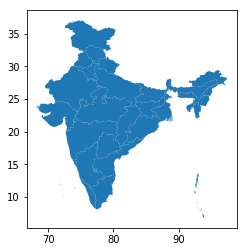

In [28]:
states_locations=gpd.read_file("Downloads/Indian States/Indian_states.shp")
states_locations.plot()
#states_locations.drop('Daman & Diu')
states_locations

In [29]:
merged=states_locations.set_index('st_nm').join(states_data.set_index("Name of State / UT"))
merged

,geometry,Total Confirmed cases,Death,Cured/Discharged/Migrated
st_nm,,,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",48.0,0.0,37.0
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",139.0,0.0,21.0
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",5586.0,9.0,3521.0
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",7825.0,55.0,5781.0
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",411.0,6.0,322.0
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",2303.0,12.0,1513.0
Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",91.0,0.0,27.0
Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",NaN,NaN,NaN
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",864.0,1.0,152.0


C:\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


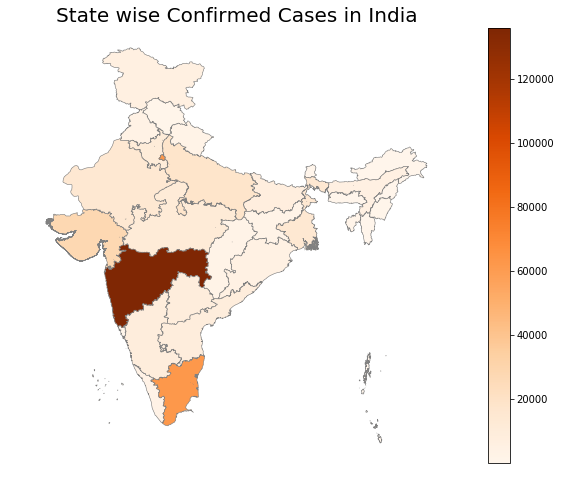

In [30]:
fig,ax=plt.subplots(1,figsize=(15,8))
ax.axis("off")
ax.set_title("State wise Confirmed Cases in India",fontdict={'fontsize':'20','fontweight':'5'})
merged.plot(column="Total Confirmed cases",cmap="Oranges",linewidth=0.6,ax=ax,edgecolor='0.5',legend=True)

C:\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


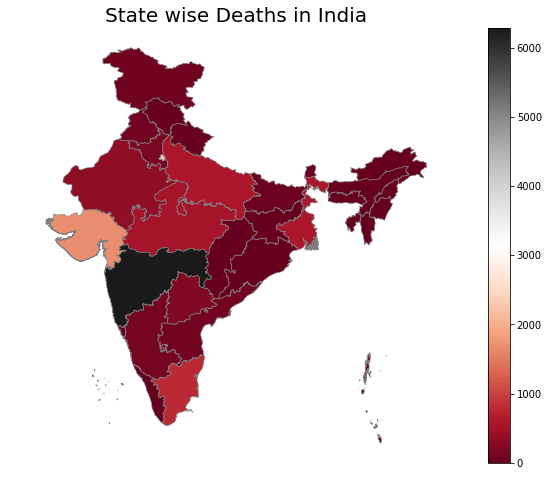

In [31]:
fig,ax=plt.subplots(1,figsize=(15,8))
ax.axis("off")
ax.set_title("State wise Deaths in India",fontdict={'fontsize':'20','fontweight':'5'})
merged.plot(column="Death",cmap="RdGy",linewidth=0.6,ax=ax,edgecolor='0.5',legend=True)

C:\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


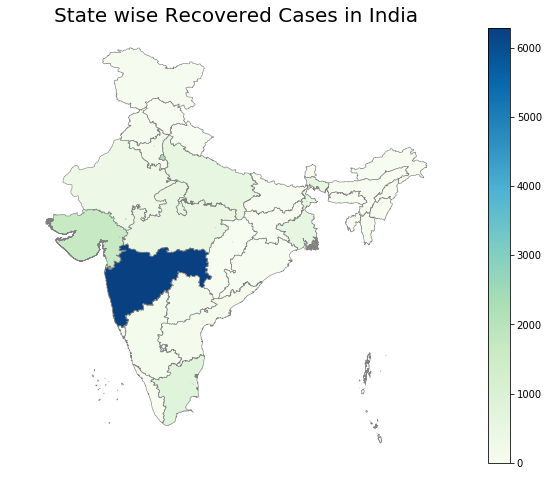

In [32]:
fig,ax=plt.subplots(1,figsize=(15,8))
ax.axis("off")
ax.set_title("State wise Recovered Cases in India",fontdict={'fontsize':'20','fontweight':'5'})
merged.plot(column="Death",cmap="GnBu",linewidth=0.6,ax=ax,edgecolor='0.5',legend=True)

In [33]:
co=india_data[['Date','Total Confirmed cases',"Death","Cured/Discharged/Migrated"]]
india_data=co.groupby(['Date']).agg({"Total Confirmed cases":"sum","Death":"sum","Cured/Discharged/Migrated":"sum"})
india_data=india_data.sort_values(["Total Confirmed cases","Death","Cured/Discharged/Migrated"],ascending=[1,1,1])
india_data["Days Since"]=india_data.index-india_data.index[0]
india_data["Days Since"]=india_data["Days Since"].dt.days
bins=np.linspace(min(india_data['Total Confirmed cases']),max(india_data['Total Confirmed cases']),4)
group_names=["low","medium","high"]
india_data["Confirmed Rate"]=pd.cut(india_data["Total Confirmed cases"],bins,labels=group_names,include_lowest=True)
bins=np.linspace(min(india_data["Death"]),max(india_data["Death"]),4)
india_data["Death Rate"]=pd.cut(india_data["Death"],bins,labels=group_names,include_lowest=True)
bins=np.linspace(min(india_data["Cured/Discharged/Migrated"]),max(india_data["Cured/Discharged/Migrated"]),4)
india_data["Recovered Rate"]=pd.cut(india_data["Cured/Discharged/Migrated"],bins,labels=group_names,include_lowest=True)
columns_name=['Days Since','Total Confirmed cases','Confirmed Rate','Death','Death Rate','Cured/Discharged/Migrated','Recovered Rate']
india_data_reindex=india_data.reindex(columns=columns_name)
india_data=india_data_reindex
india_data.tail(10)
india_data

,Days Since,Total Confirmed cases,Confirmed Rate,Death,Death Rate,Cured/Discharged/Migrated,Recovered Rate
Date,,,,,,,
2020-01-30,0,1,low,0,low,0,low
2020-01-31,1,1,low,0,low,0,low
2020-02-01,2,2,low,0,low,0,low
2020-02-02,3,3,low,0,low,0,low
2020-02-03,4,3,low,0,low,0,low
2020-02-04,5,3,low,0,low,0,low
2020-02-05,6,3,low,0,low,0,low
2020-02-06,7,3,low,0,low,0,low
2020-02-07,8,3,low,0,low,0,low


Predicting Confirmed Cases

In [34]:
train_pr=india_data.iloc[:int(india_data.shape[0]*0.90)]
test_pr=india_data.iloc[int(india_data.shape[0]*0.90):]
test_pr.tail()

,Days Since,Total Confirmed cases,Confirmed Rate,Death,Death Rate,Cured/Discharged/Migrated,Recovered Rate
Date,,,,,,,
2020-06-19,141,371605,high,12573,high,204711,high
2020-06-20,142,385783,high,12948,high,213831,high
2020-06-21,143,401334,high,13254,high,227756,high
2020-06-22,144,417450,high,13699,high,237196,high
2020-06-23,145,432200,high,14011,high,248190,high


In [35]:
from sklearn.linear_model import *
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
pr=PolynomialFeatures(degree=5)
t=pr.fit_transform(np.array(train_pr["Days Since"]).reshape(-1,1))
te=pr.fit_transform(np.array(test_pr["Days Since"]).reshape(-1,1))
y=train_pr["Total Confirmed cases"]
lr=LinearRegression(normalize=True)
lr.fit(t,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [36]:
pred_pr=lr.predict(te)
pred_pr,test_pr["Total Confirmed cases"]

(array([257945.2723421 , 268453.38578325, 279286.48211447, 290451.61837383,
        301955.94466271, 313806.70466851, 326011.23618735, 338576.97164676,
        351511.43862836, 364822.26039058, 378517.15639132, 392603.9428107 ,
        407090.5330737 , 421984.93837287, 437295.26819106]), Date
 2020-06-09    257795
 2020-06-10    267356
 2020-06-11    277648
 2020-06-12    289220
 2020-06-13    301009
 2020-06-14    313486
 2020-06-15    325452
 2020-06-16    335407
 2020-06-17    345792
 2020-06-18    358243
 2020-06-19    371605
 2020-06-20    385783
 2020-06-21    401334
 2020-06-22    417450
 2020-06-23    432200
 Name: Total Confirmed cases, dtype: int64)

In [37]:
rmse=np.sqrt(mean_squared_error(test_pr["Total Confirmed cases"],pred_pr))
print("RMSE value for Polynomial Regression:",rmse)

RMSE value for Polynomial Regression: 4217.07857135105


In [38]:
from datetime import timedelta
pre_date=[]
pre_poly=[]
e=int(input())
for i in range(1,e+1):
    pre_date.append(india_data.index[-1]+timedelta(days=i))
    pre_data_poly=pr.fit_transform(np.array(india_data["Days Since"].max()+i).reshape(-1,1))
    pre_poly.append(lr.predict(pre_data_poly)[0])
#pre_poly
#pre_date

5


In [39]:
pd.set_option('display.float_format',lambda x: '%.6f' % x)
model_prediction=pd.DataFrame(zip(pre_date,pre_poly),columns=["Date","Total Confirmed Cases"])
model_prediction

,Date,Total Confirmed Cases
0,2020-06-24,453029.730824
1,2020-06-25,469196.633903
2,2020-06-26,485804.384919
3,2020-06-27,502861.491741
4,2020-06-28,520376.563145


Predicting Deaths

In [40]:
from sklearn.linear_model import *
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
pr=PolynomialFeatures(degree=4)
t=pr.fit_transform(np.array(train_pr["Days Since"]).reshape(-1,1))
te=pr.fit_transform(np.array(test_pr["Days Since"]).reshape(-1,1))
y=train_pr["Death"]
lr=LinearRegression(normalize=True)
lr.fit(t,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [41]:
pred_pr=lr.predict(te)
pred_pr,test_pr["Death"]

(array([ 7350.54813347,  7620.63855006,  7897.84151611,  8182.27609844,
         8474.06230987,  8773.32110926,  9080.1744015 ,  9394.74503747,
         9717.1568141 , 10047.53447434, 10386.00370716, 10732.69114754,
        11087.72437649, 11451.23192106, 11823.3432543 ]), Date
 2020-06-09     7466
 2020-06-10     7745
 2020-06-11     8102
 2020-06-12     8498
 2020-06-13     8884
 2020-06-14     9195
 2020-06-15     9520
 2020-06-16     9900
 2020-06-17    11903
 2020-06-18    12237
 2020-06-19    12573
 2020-06-20    12948
 2020-06-21    13254
 2020-06-22    13699
 2020-06-23    14011
 Name: Death, dtype: int64)

In [42]:
rmse=np.sqrt(mean_squared_error(test_pr["Death"],pred_pr))
print("RMSE value for Polynomial Regression:",rmse)

RMSE value for Polynomial Regression: 1522.2355834327204


In [43]:
from datetime import timedelta
pre_date=[]
pre_poly=[]
for i in range(1,e+1):
    pre_date.append(india_data.index[-1]+timedelta(days=i))
    pre_data_poly=pr.fit_transform(np.array(india_data["Days Since"].max()+i).reshape(-1,1))
    pre_poly.append(lr.predict(pre_data_poly)[0])
#pre_poly
#pre_date

In [44]:
pd.set_option('display.float_format',lambda x: '%.6f' % x)
model_prediction=pd.DataFrame(zip(pre_date,pre_poly),columns=["Date","Deaths"])
model_prediction

,Date,Deaths
0,2020-06-24,12204.188795
1,2020-06-25,12593.899909
2,2020-06-26,12992.608907
3,2020-06-27,13400.449046
4,2020-06-28,13817.554529


Predicting Discharged Cases

In [45]:
from sklearn.linear_model import *
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
pr=PolynomialFeatures(degree=6)
t=pr.fit_transform(np.array(train_pr["Days Since"]).reshape(-1,1))
te=pr.fit_transform(np.array(test_pr["Days Since"]).reshape(-1,1))
y=train_pr["Cured/Discharged/Migrated"]
lr=LinearRegression(normalize=True)
lr.fit(t,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [46]:
pred_pr=lr.predict(te)
pred_pr,test_pr["Cured/Discharged/Migrated"]

(array([133426.81971402, 139995.31738101, 146773.18485105, 153762.012575  ,
        160963.17925407, 168377.84156419, 176006.92371269, 183851.10682735,
        191910.81817773, 200186.2202288 , 208677.19952701, 217383.35541848,
        226303.98859973, 235438.08950054, 244784.3264993 ]), Date
 2020-06-09    129215
 2020-06-10    135206
 2020-06-11    141029
 2020-06-12    147195
 2020-06-13    154330
 2020-06-14    162379
 2020-06-15    169798
 2020-06-16    180013
 2020-06-17    186935
 2020-06-18    194325
 2020-06-19    204711
 2020-06-20    213831
 2020-06-21    227756
 2020-06-22    237196
 2020-06-23    248190
 Name: Cured/Discharged/Migrated, dtype: int64)

In [47]:
rmse=np.sqrt(mean_squared_error(test_pr["Cured/Discharged/Migrated"],pred_pr))
print("RMSE value for Polynomial Regression:",rmse)

RMSE value for Polynomial Regression: 4860.2133018983395


In [48]:
from datetime import timedelta
pre_date=[]
pre_poly=[]
for i in range(1,e+1):
    pre_date.append(india_data.index[-1]+timedelta(days=i))
    pre_data_poly=pr.fit_transform(np.array(india_data["Days Since"].max()+i).reshape(-1,1))
    pre_poly.append(lr.predict(pre_data_poly)[0])
#pre_poly
#pre_date

In [49]:
pd.set_option('display.float_format',lambda x: '%.6f' % x)
model_prediction=pd.DataFrame(zip(pre_date,pre_poly),columns=["Date","Total Discharged Cases"])
model_prediction

,Date,Total Discharged Cases
0,2020-06-24,254341.033971
1,2020-06-25,264106.200165
2,2020-06-26,274077.454921
3,2020-06-27,284252.057211
4,2020-06-28,294626.882516
